In [ ]:
pip install tensorflow

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import  load_model,Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.utils import  to_categorical,plot_model #to_categorical istedigimiz hedefi ohe yapar,

import matplotlib.pyplot as plt
import numpy as np
from warnings import filterwarnings

In [29]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

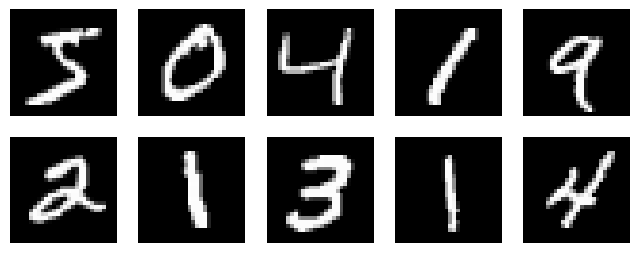

In [4]:
plt.figure(figsize=(8,8))
for i in range(0,10):
  ax=plt.subplot(5,5,i+1)
  plt.imshow(x_train[i],cmap='gray')
  plt.axis('off')

In [5]:
x_train.shape #60000 adet resim var ve 28x28 boyutunda.

(60000, 28, 28)

In [6]:
def görsellestir(data,num_range):
  plt.figure(figsize=(8,8))
  for i in range(num_range):
    ax=plt.subplot(5,5,i+1)
    plt.imshow(data[i],cmap='gray')
    plt.axis('off')

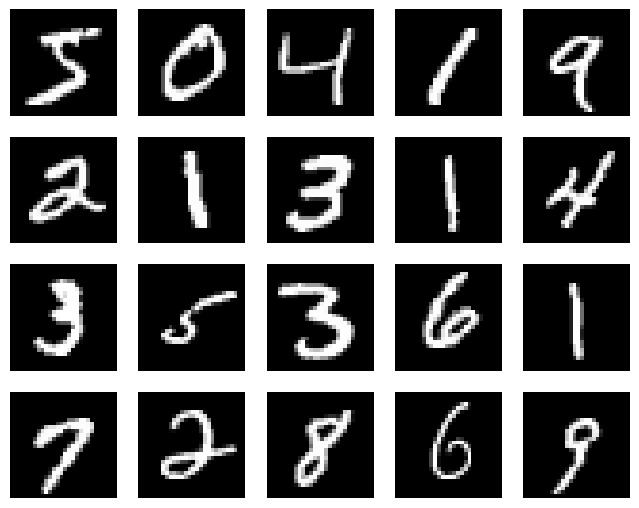

In [7]:
görsellestir(x_train,20)

In [8]:
# şimdi bilgisayarın bunu nasıl anladıgına gelirsek rgb renklerle pc bu rakamları kodluyor r:255,g:255,b:255 olursa eğer ortalamarıda 255 olacagından beyaz renk ortaya cıkar
# 0 olursa siyah olur bilgisayara bu sekilde neyin ne oldugunu göstermemiz gerek

In [9]:
def num_gorsel(data):
  fig=plt.figure(figsize=(12,12))
  ax=fig.add_subplot(111)
  ax.imshow(data,cmap='gray')
  width,height=data.shape

  threshold=data.max()/2.5

  for x in range(width):
    for y in range(height):
      ax.annotate(str(round(data[x][y],2)),xy=(y,x),color='white' if  data[x][y]<threshold else 'black')

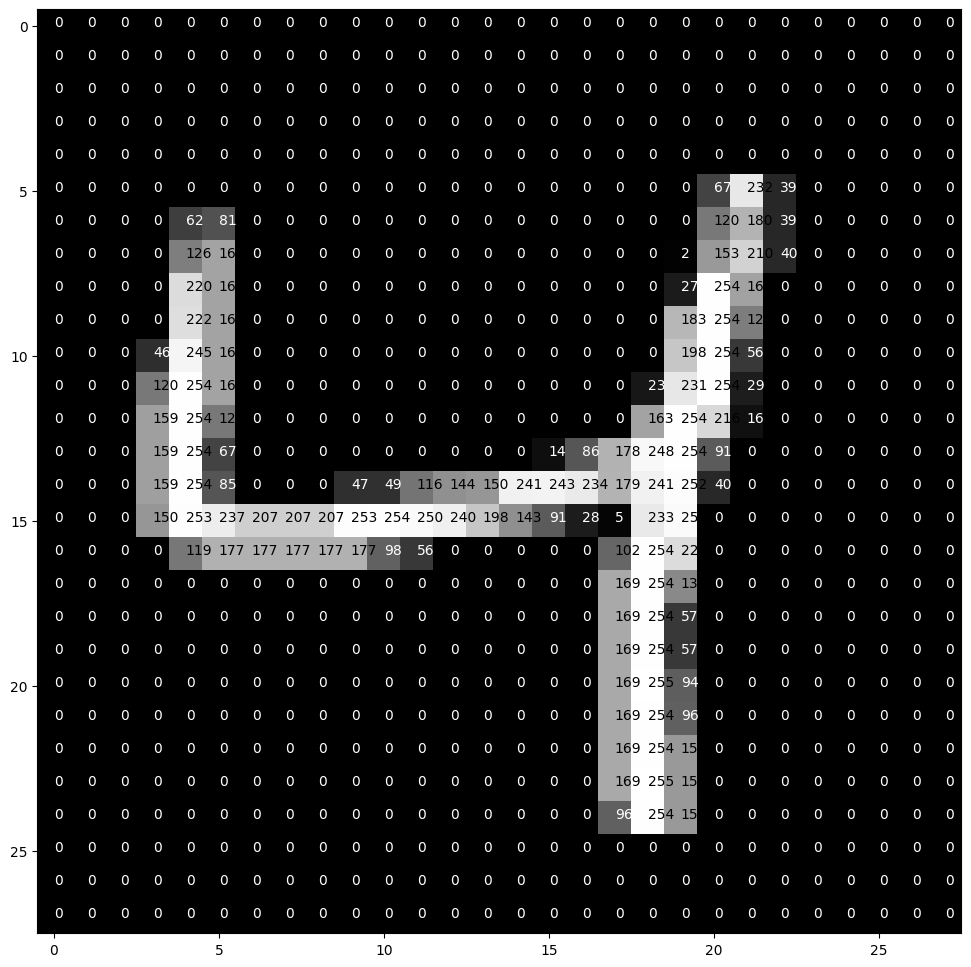

In [10]:
num_gorsel(x_train[2])

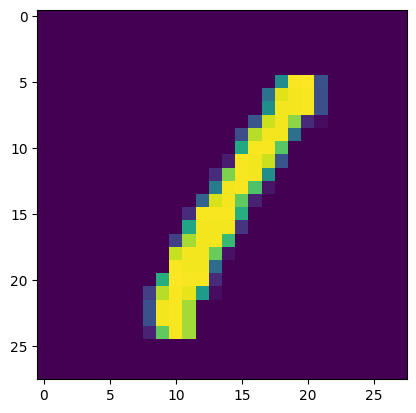

In [21]:
plt.imshow(x_train[3])

In [35]:
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [37]:
y_train[0:2]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [ ]:
#şimdi piksellerin tuttugu değerleri reshape yaparak bir kolonun içine atacagız ki algoritma anlasın

In [ ]:
x_train=x_train.reshape(x_train.shape[0],28,28,1)
x_test=x_test.reshape(x_test.shape[0],28,28,1)

In [ ]:
x_train.shape #1 boyutlu yeni bir kanal açtık bu görsellerde ki piksellerin değerini tutacak

(60000, 28, 28, 1)

In [ ]:
x_train=x_train.astype('float32')/255
x_test=x_test.astype('float32')/255

In [ ]:
#BURAYA KADAR İLK ÖNCE Y KISMINDA Bİ KATEGORİK DEĞİŞİM YAPTIK MODELİN HEDEF VERİYİ ANLAYABİLMESİ İÇİN
#SONRASINDA X KISMINDA 28X28'LİK PİKSELLERİN DEĞERİNİ TUTACAK YENİ BİR KANALI RESHAPE İŞLEMİ İLE AÇTIK
#VE EN SON BİR SCALİNG İŞLEMİ YAPTIK X SETİ ÜSTÜNDE

MODELLEME


In [39]:
#İLK OLARAK DIŞ KATMANI YANİ GİRİŞLER,HİDDEN LAYERLER VE ÇIKIŞLARI OLUŞTURMALIYIZ

In [46]:
model=tf.keras.Sequential([Flatten(input_shape=(28,28,1)), #GİRİŞLERİ BELİRTTİK
                           Dense(units=128,activation='relu',name='layer1'),#GİZLİ KATMANI EKLEDİK ACT.FONKS.=RELU YAPTIK VE 128 ADET NÖRON EKLEDİK
                           Dense(units=10,activation='softmax',name='Output_layer')]) #ÇOK SINIFLU BİR SINIFLANDIRMA OLDUGU İÇİN SOFTMAX KULLANDIK İKİ SINIFLI OLSAYDI SİGMOİD OLURDU UNİT İSE SINIF SAYISI YANİ ÇIKIŞ SAYISIDIR.



/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [47]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=[tf.keras.metrics.Precision(),tf.keras.metrics.Recall(),"accuracy"])


#BURADA MODELİMİZİN KAYBI NASIL HESAPLAYACAGINI("LOSS"),NASIL OPTİMİZE EDECEĞİNİ VE DOĞRULUK ORANLARINI NEYLE HESAPLAYACAGINI TANIMLADIK

# LOSS KULLANIM

categorical_crossentropy

🧠 Çok sınıflı sınıflandırma (multi-class classification)

🎯 Örnek: MNIST (0-9 arası rakam tanıma), 10 farklı sınıf

✔️ Kullanım koşulları:

Etiketler one-hot encoded olmalı

(örneğin 3 için [0,0,0,1,0,0,0,0,0,0])

---



3. binary_crossentropy

🧠 İkili sınıflandırma (binary classification)

🎯 Örnek: e-posta spam mi, değil mi? (0 ya da 1)

---



4. mean_squared_error (MSE)

🧠 Regresyon problemleri (Sayı tahmini)

🎯 Örnek: Evin fiyatını tahmin etme

In [44]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer1 (Dense)                  │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output layer (Dense)            │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [56]:
model.fit(x_train,y_train,batch_size=128,epochs=5,verbose=1,validation_data=(x_test,y_test))

#BURADA TRAİN VERİLERİNİ VERDİKTEN SONRA BATCH_SİZE BELİRLEDİK BU ALGORİTMANIN 128 ADET RESİM ALIR VE AĞIRLIKLARINI GÜNCELLER DEMEK YANİ ELİMİZDE 60.000 RESİM VAR 128 ADET ALIYOR BU DA YAKLAŞIK 468 ADIM DEMEK EĞER EPOCH 1 OLURSA
#468 ADIMDA İŞ BİTER DEMEK

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9824 - loss: 0.0735 - precision_2: 0.9844 - recall_2: 0.9815 - val_accuracy: 0.9635 - val_loss: 0.3303 - val_precision_2: 0.9648 - val_recall_2: 0.9627
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9862 - loss: 0.0552 - precision_2: 0.9876 - recall_2: 0.9854 - val_accuracy: 0.9674 - val_loss: 0.2872 - val_precision_2: 0.9693 - val_recall_2: 0.9666
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9854 - loss: 0.0512 - precision_2: 0.9875 - recall_2: 0.9842 - val_accuracy: 0.9655 - val_loss: 0.3504 - val_precision_2: 0.9671 - val_recall_2: 0.9649
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9834 - loss: 0.0659 - precision_2: 0.9850 - recall_2: 0.9827 - val_accuracy: 0.9617 - val_loss: 0.3501 - val_precision_2: 0.9640 - val_recall_2: 0.9611
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9847 - loss: 0.0645 - precision_2: 0.9862 - recall_2: 0.9840 - val_

In [57]:
loss,prec,recall,acc=model.evaluate(x_test,y_test,verbose=False)

In [58]:
print("loss:",loss*100)
print("prec:",prec*100)
print("recall:",recall*100)
print("acc:",acc*100)

loss: 35.20815372467041
prec: 96.69910669326782
recall: 96.38000130653381
acc: 96.49999737739563
